# Sprocket Central Pty Ltd company: Customers Recommendation project - Exploratory Data analysis

<img src="sprocket_central.png" width="600" />

### About the Dataset & objective of the report

**Sprocket Central Pty Ltd**, a medium size bikes & cycling accessories organisation which has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. 

The client provided us with 3 datasets:

**Customer Demographic**

**Customer Addresses**

**Transactions data in the past 3 months**

I have conducted a data cleaning process on each dataset and joined them together.

i will start data exploration to answer following questions.

What are the trends in the underlying data?

Which customer segment has the highest customer value?

What do you propose should be Sprocket Central Pty Ltd ’s marketing and growth strategy?


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
pd.set_option('display.expand_frame_repr', False)

In [2]:
#Importing Final dataset

CTA=pd.read_csv('CTA_wrangling.csv')

In [3]:
CTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           19327 non-null  int64  
 1   transaction_id                       19327 non-null  int64  
 2   product_id                           19327 non-null  int64  
 3   customer_id                          19327 non-null  int64  
 4   transaction_date                     19327 non-null  object 
 5   online_order                         19327 non-null  bool   
 6   order_status                         19327 non-null  object 
 7   brand                                19327 non-null  object 
 8   product_line                         19327 non-null  object 
 9   product_class                        19327 non-null  object 
 10  product_size                         19327 non-null  object 
 11  list_price                  

In [4]:
# ammending column data types

CTA['transaction_id']=CTA['transaction_id'].astype(str)
CTA['product_id']=CTA['product_id'].astype(str)
CTA['customer_id']=CTA['customer_id'].astype(str)
CTA['transaction_date']=pd.to_datetime(CTA['transaction_date'])
CTA['Transaction_day']=pd.to_datetime(CTA['Transaction_day'])
CTA['Transaction_year']=pd.to_datetime(CTA['Transaction_year'])  
CTA['postcode']=CTA['postcode'].astype(str)                          

In [5]:
# Dropping uneccessary column

CTA.drop('Unnamed: 0',axis=1,inplace=True)

# Exploratory data analysis

In [6]:
#numerical Data statistics

CTA.describe()

,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,Year of birth,Age,property_valuation
count,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000
mean,1106.447654,555.749864,48.937135,10.680499,1977.140787,43.394681,7.516014
std,582.891952,405.716005,28.644584,5.672739,12.599922,12.604134,2.826879
min,12.010000,7.210000,0.000000,1.000000,1931.000000,19.000000,1.000000
25%,575.270000,215.140000,24.000000,6.000000,1968.000000,34.000000,6.000000
50%,1163.890000,507.580000,48.000000,11.000000,1977.000000,43.000000,8.000000
75%,1635.300000,795.100000,73.000000,15.000000,1987.000000,53.000000,10.000000
max,2091.470000,1759.850000,99.000000,22.000000,2002.000000,89.000000,12.000000


# Checking For correlations between numerical variables

In [7]:
CTA.corr()

,online_order,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,Year of birth,Age,property_valuation
online_order,1.000000,0.000822,0.008342,0.003343,0.012068,0.002679,-0.003162,-0.005538
list_price,0.000822,1.000000,0.552508,0.007134,-0.006266,0.003404,-0.003211,-0.010833
standard_cost,0.008342,0.552508,1.000000,-0.009396,-0.014644,-0.000065,-0.000045,-0.000449
past_3_years_bike_related_purchases,0.003343,0.007134,-0.009396,1.000000,-0.021690,0.040243,-0.039971,0.012233
tenure,0.012068,-0.006266,-0.014644,-0.021690,1.000000,-0.442701,0.441763,-0.018756
Year of birth,0.002679,0.003404,-0.000065,0.040243,-0.442701,1.000000,-0.999217,-0.012802
Age,-0.003162,-0.003211,-0.000045,-0.039971,0.441763,-0.999217,1.000000,0.013601
property_valuation,-0.005538,-0.010833,-0.000449,0.012233,-0.018756,-0.012802,0.013601,1.000000


There are no noticable correlation in the data

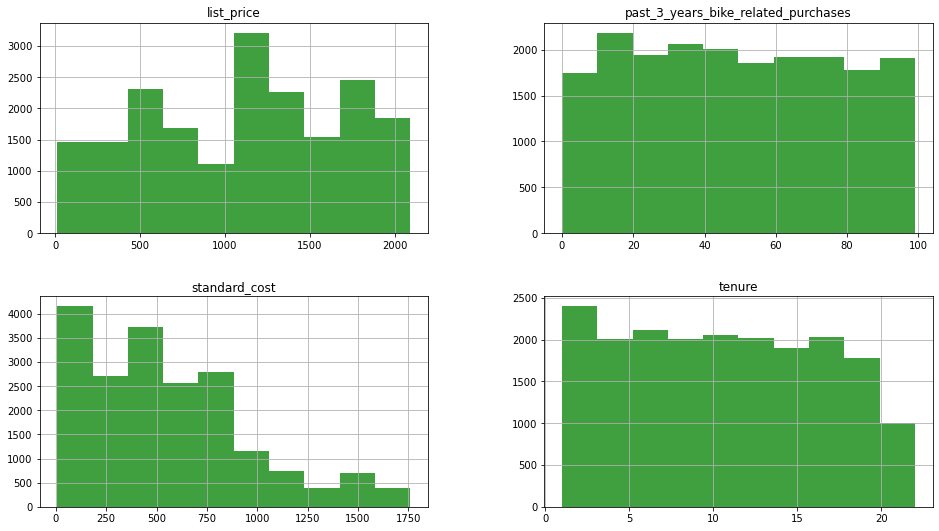

In [8]:
#plotting a histogram to check the distribution of data and how it frequents along the dataset

CTA.hist(['list_price','standard_cost','past_3_years_bike_related_purchases','tenure'],figsize=(16,24),layout=(5,2),alpha=0.75,facecolor='g');

Observations:

1. List prices varies mostly between 1000 and 1500
2. Standard cost varies mostly less than 250
3. purchases in the last 3 years are from 35  to 40 purchases i most cases but there is no specific trend shown here 
4. Data doesn't seem to have outlires in it

# Analyzing online orders vs. instore orders

In [9]:
# The number of orders made online and instore

CTA.groupby('online_order')['transaction_id'].count().sort_values(ascending=False)

online_order
True     9851
False    9476
Name: transaction_id, dtype: int64

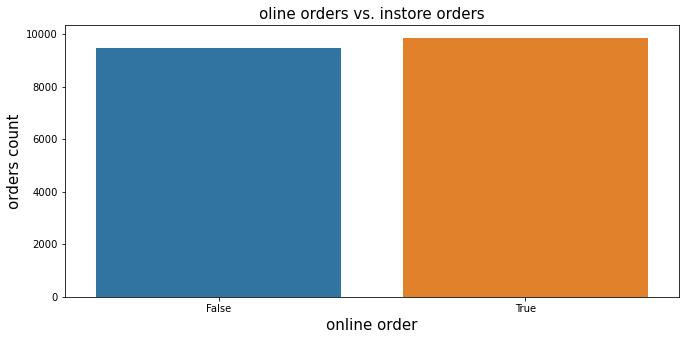

In [10]:
plt.figure(figsize=(11,5));
sns.countplot(CTA['online_order']);
plt.title('oline orders vs. instore orders',size=15)
plt.xlabel('online order',size=15);
plt.ylabel('orders count',size=15);

In [11]:
# The amount of sales in each method 

CTA.groupby('online_order')['list_price'].sum().sort_values(ascending=False)

online_order
True     10904246.46
False    10480067.35
Name: list_price, dtype: float64

In [12]:
# What are the most sold products online?

CTA.groupby(['online_order','brand'])['list_price'].sum()

online_order  brand         
False         Giant Bicycles    1933421.14
              Norco Bicycles    1301627.82
              OHM Cycles        1366460.78
              Solex             2206276.03
              Trek Bicycles     1697090.88
              WeareA2B          1975190.70
True          Giant Bicycles    2058395.86
              Norco Bicycles    1276515.33
              OHM Cycles        1558156.34
              Solex             2192041.97
              Trek Bicycles     1757637.05
              WeareA2B          2061499.91
Name: list_price, dtype: float64

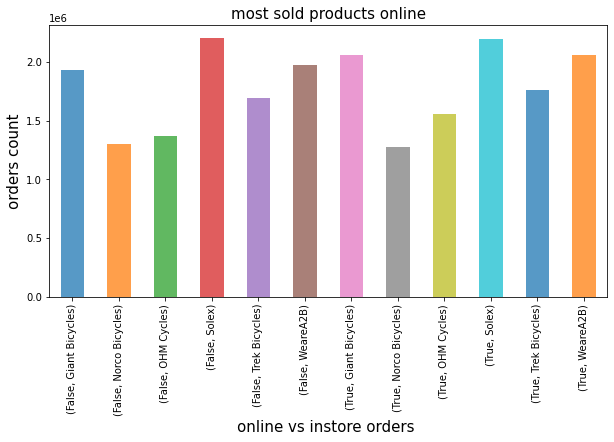

In [13]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'];
plt.figure(figsize=(10,5));
CTA.groupby(['online_order','brand'])['list_price'].sum().plot.bar(color=colors,alpha=0.75);
plt.title('most sold products online',size=15)
plt.xlabel('online vs instore orders ',size=15);
plt.ylabel('orders count',size=15);

In [14]:
# Which state with the highest number fo purchases online and which is in store?

CTA.groupby('online_order')['state'].value_counts()

online_order  state          
False         NSW                4819
              VIC                2135
              QLD                2029
              New South Wales     250
              Victoria            243
True          NSW                5036
              VIC                2267
              QLD                2106
              New South Wales     222
              Victoria            220
Name: state, dtype: int64

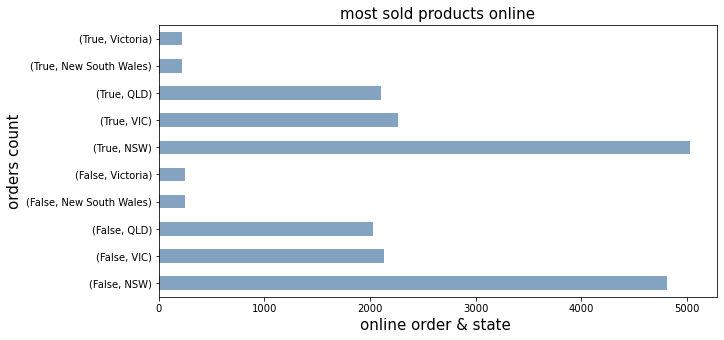

In [15]:
plt.figure(figsize=(10,5));
CTA.groupby('online_order')['state'].value_counts().plot.barh(color=(0.2, 0.4, 0.6, 0.6));
plt.title('most sold products online',size=15)
plt.xlabel('online order & state ',size=15);
plt.ylabel('orders count',size=15);

In [16]:
# which industry categoty orders the most from us online?

CTA.groupby('online_order')['job_industry_category'].value_counts()

online_order  job_industry_category
False         Manufacturing            3495
              Financial Services       1851
              Health                   1476
              Retail                    856
              Property                  627
              Entertainment             343
              IT                        336
              Argiculture               296
              Telecommunications        196
True          Manufacturing            3659
              Financial Services       1947
              Health                   1572
              Retail                    890
              Property                  651
              IT                        355
              Entertainment             351
              Argiculture               270
              Telecommunications        156
Name: job_industry_category, dtype: int64

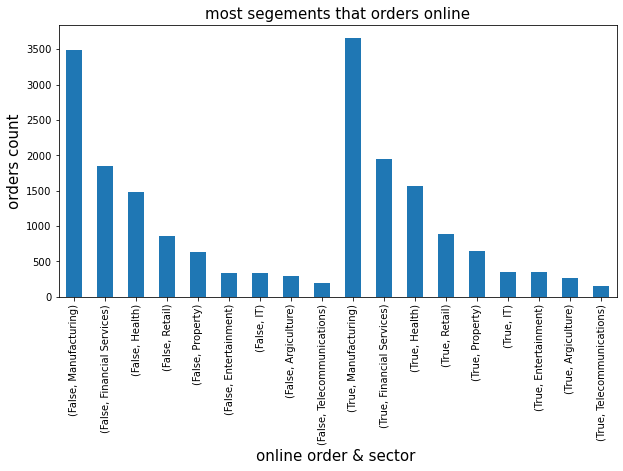

In [17]:
plt.figure(figsize=(10,5));
CTA.groupby('online_order')['job_industry_category'].value_counts().plot.bar();
plt.title('most segements that orders online',size=15)
plt.xlabel('online order & sector ',size=15);
plt.ylabel('orders count',size=15);

Observations:

1. People order online slightly more than instore purchases which reveals that our customer's purchasing behaviour is used to ecommerce and we can increase our sales by putting more products on our website and that our online marketing strategy is successful
2. The total amount of money spent by consumers to buy products online is more that money spent to buy instore which emphasises point number one 
3. our Top 3 sold products are Giant Bicycles, Norco Bicycles,OHM Cycles wether they are sold online or instore
4. The Top 3 states to purchase from us are (NSW),(VIC),(QLD) wether they buy online or instore
5. The To 3 job sectors to purchase from us are Manufacturing , Financial Services ,Health wether they buy online or instore

# Analyzing Males vs. Females consumer  behaviour

In [18]:
#  How much sales are made by women and by men

CTA.groupby('gender')['list_price'].sum()

gender
Female    10912309.10
Male      10472004.71
Name: list_price, dtype: float64

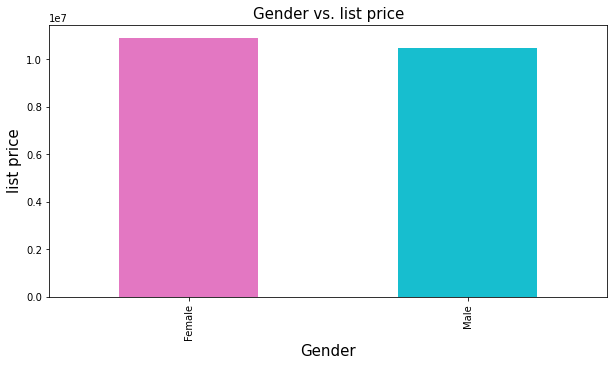

In [19]:
plt.figure(figsize=(10,5));
CTA.groupby('gender')['list_price'].sum().plot.bar(color=['#e377c2', '#17becf']);
plt.title('Gender vs. list price',size=15)
plt.xlabel('Gender',size=15);
plt.ylabel('list price',size=15);

In [20]:
# No. of Females & males ordered online

CTA.groupby('gender')['online_order'].value_counts()

gender  online_order
Female  True            5026
        False           4882
Male    True            4825
        False           4594
Name: online_order, dtype: int64

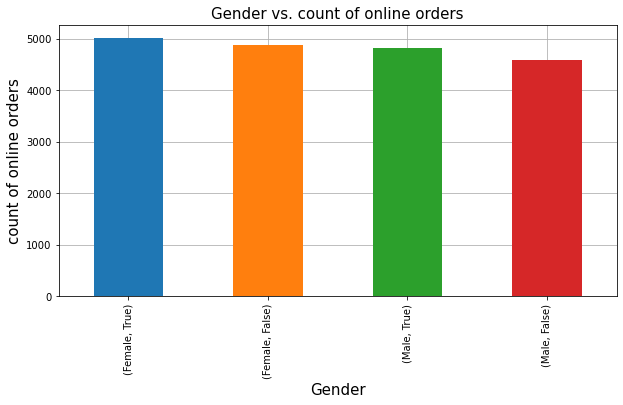

In [21]:
plt.figure(figsize=(10,5));
CTA.groupby('gender')['online_order'].value_counts().plot.bar(color=colors,zorder=3);
plt.grid(zorder=0)
plt.title('Gender vs. count of online orders',size=15)
plt.xlabel('Gender',size=15);
plt.ylabel('count of online orders',size=15);

In [22]:
# What kind of brands do each gender tend to buy

CTA.groupby('gender')['brand'].value_counts()

gender  brand         
Female  Solex             2144
        WeareA2B          1650
        Giant Bicycles    1647
        OHM Cycles        1530
        Trek Bicycles     1514
        Norco Bicycles    1423
Male    Solex             2027
        Giant Bicycles    1589
        WeareA2B          1553
        OHM Cycles        1446
        Norco Bicycles    1404
        Trek Bicycles     1400
Name: brand, dtype: int64

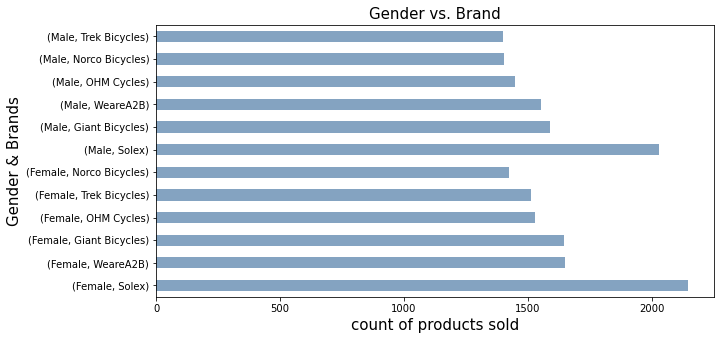

In [23]:
plt.figure(figsize=(10,5));
CTA.groupby('gender')['brand'].value_counts().plot.barh(color=(0.2, 0.4, 0.6, 0.6));
plt.title('Gender vs. Brand',size=15);
plt.xlabel('count of products sold',size=15);
plt.ylabel('Gender & Brands',size=15);

Observations:
    
1. Sales made by Women exceeds sales made by Men which means that we have big portion of female customer
2. we already established that number of online purchases are more in general than instore purchases, number of online orders made by women are 3568 , number of online orders made by men are 3481
3. Top 2 products purchased by Females are Solex,WeareA2B
4. Top 2 products purchased by Males are Solex,Giant Bicycles

# Brands analysis

In [24]:
# Which brand is most sold

CTA.groupby('brand')['list_price'].sum().sort_values(ascending=False)

brand
Solex             4398318.00
WeareA2B          4036690.61
Giant Bicycles    3991817.00
Trek Bicycles     3454727.93
OHM Cycles        2924617.12
Norco Bicycles    2578143.15
Name: list_price, dtype: float64

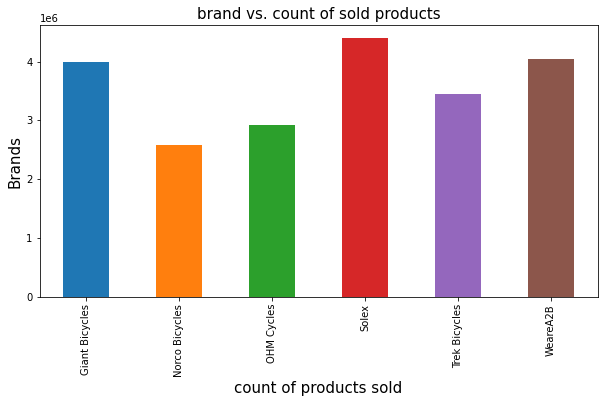

In [25]:
plt.figure(figsize=(10,5));
CTA.groupby('brand')['list_price'].sum().plot.bar(color=colors);
plt.title('brand vs. count of sold products',size=15);
plt.xlabel('count of products sold',size=15);
plt.ylabel('Brands',size=15);

In [26]:
# Which state buys which brand the most
CTA.groupby('state')['brand'].count()
CTA.groupby(['state','brand'])['transaction_id'].count()

state            brand         
NSW              Giant Bicycles    1621
                 Norco Bicycles    1476
                 OHM Cycles        1559
                 Solex             2103
                 Trek Bicycles     1472
                 WeareA2B          1624
New South Wales  Giant Bicycles      76
                 Norco Bicycles      64
                 OHM Cycles          71
                 Solex              112
                 Trek Bicycles       68
                 WeareA2B            81
QLD              Giant Bicycles     702
                 Norco Bicycles     617
                 OHM Cycles         637
                 Solex              888
                 Trek Bicycles      604
                 WeareA2B           687
VIC              Giant Bicycles     741
                 Norco Bicycles     598
                 OHM Cycles         647
                 Solex              969
                 Trek Bicycles      697
                 WeareA2B           750
Victoria

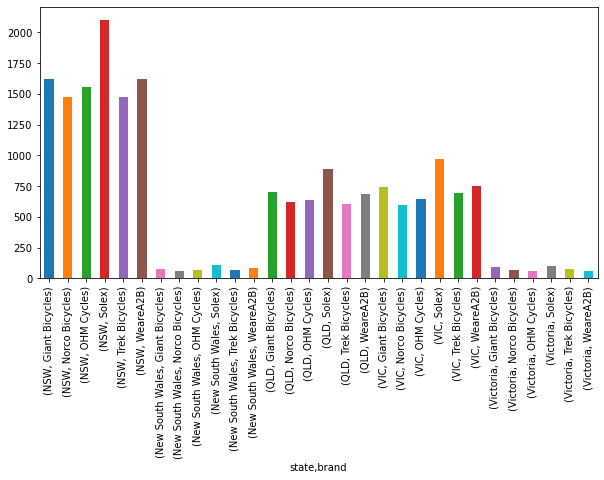

In [27]:
# Which state buys which brand the most

plt.figure(figsize=(10,5));
CTA.groupby(['state','brand'])['transaction_id'].count().plot.bar(color=colors);

Observations:
    
1. Most sold brand is Solex
2. It seems that the most brand sold in all the satetes is Solex brand

# customers who own a car vs customers who don't

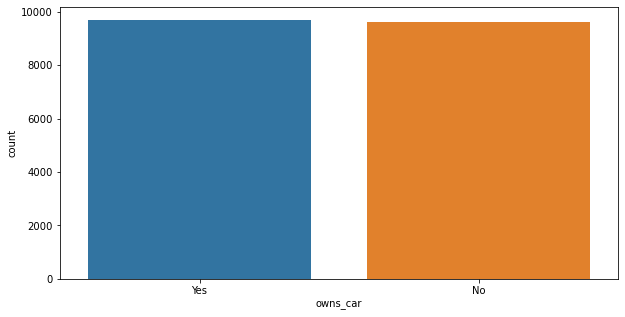

In [28]:
# count of customers who own a car vs customers who don't

plt.figure(figsize=(10,5));
sns.countplot(CTA['owns_car']);

In [29]:
# what is the count of owning a car custommerrs in females and males and vice versa

CTA.groupby('gender')['owns_car'].value_counts()

gender  owns_car
Female  Yes         5053
        No          4855
Male    No          4774
        Yes         4645
Name: owns_car, dtype: int64

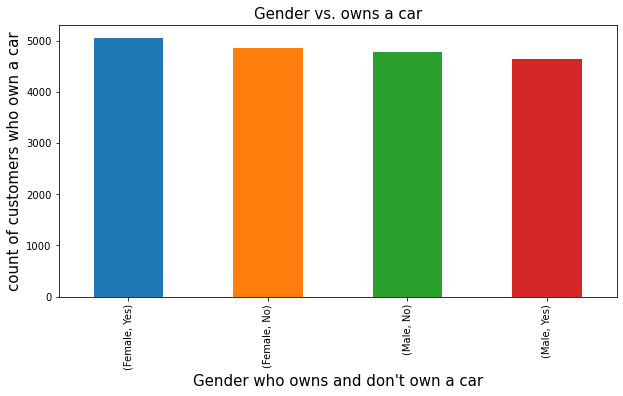

In [30]:
plt.figure(figsize=(10,5));
CTA.groupby('gender')['owns_car'].value_counts().plot.bar(color=colors);
plt.title('Gender vs. owns a car',size=15);
plt.xlabel('Gender who owns and don\'t own a car',size=15);
plt.ylabel('count of customers who own a car',size=15);

Observations:

1. Customers who own a car are more than customers who don't
2. Females who own a car are more than females who does not own a car 
3. On the other hand Males who doesn't own a car are more than Males who own a car

# General observations

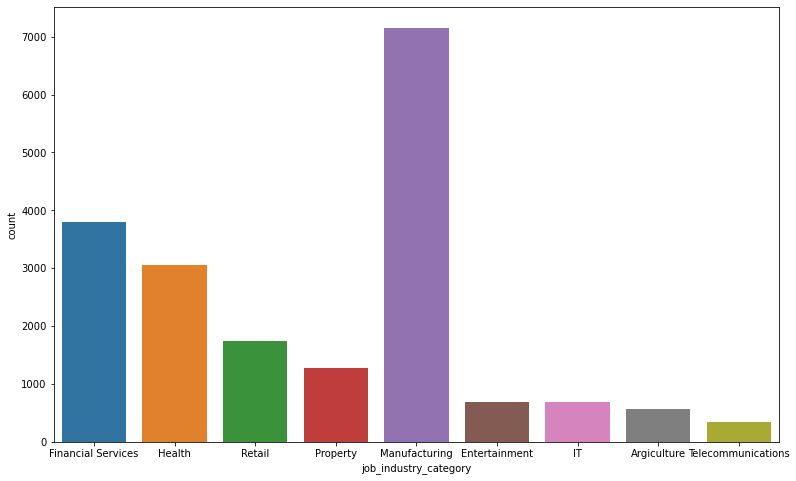

In [31]:
# Which jobcategory bought the most from us ?

plt.figure(figsize=(13,8))
sns.countplot(CTA['job_industry_category']);

In [32]:
# which Age group bough the most from us?

CTA['Age'].value_counts(ascending=False).head(10)

43.0    1273
44.0     929
47.0     754
42.0     730
46.0     590
45.0     576
41.0     560
40.0     558
35.0     493
34.0     475
Name: Age, dtype: int64

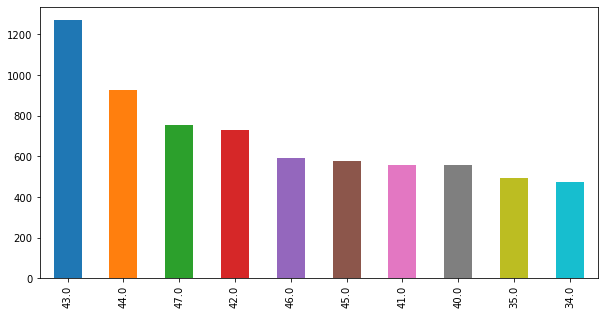

In [33]:
plt.figure(figsize=(10,5))
CTA['Age'].value_counts(ascending=False).head(10).plot.bar(color=colors);

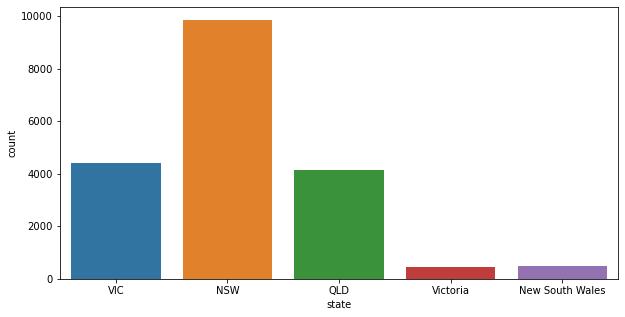

In [34]:
plt.figure(figsize=(10,5));
sns.countplot(CTA['state']);

In [35]:
#checking for the total sales amount per month

CTA.groupby('Transaction_month')['list_price'].sum().sort_values(ascending=False)

Transaction_month
Oct    1909751.36
Aug    1866059.51
May    1858262.12
Jul    1816802.84
Jan    1801750.65
Apr    1769650.22
Nov    1764685.28
Feb    1755611.15
Mar    1736753.94
Dec    1728121.85
Sep    1690439.47
Jun    1686425.42
Name: list_price, dtype: float64

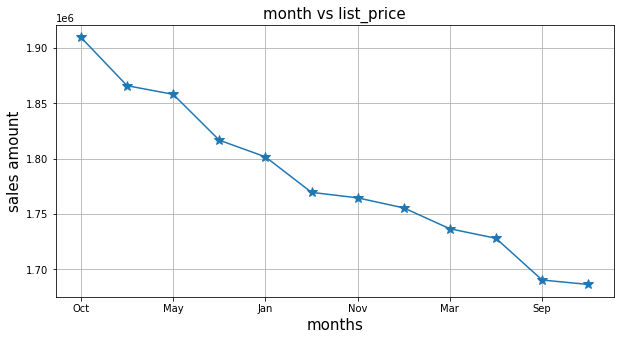

In [36]:
plt.figure(figsize=(10,5))
CTA.groupby('Transaction_month')['list_price'].sum().sort_values(ascending=False).plot.line(markersize=10,marker='*');
plt.title('month vs list_price',size=15);
plt.xlabel('months',size=15);
plt.ylabel('sales amount',size=15);
plt.grid()

In [37]:
# Most selling day in the week

CTA.groupby('day_of_the_week')['list_price'].mean().sort_values(ascending=False)

day_of_the_week
Saturday     1121.335269
Wednesday    1117.308980
Tuesday      1107.195164
Thursday     1106.424483
Monday       1098.735835
Sunday       1097.363580
Friday       1096.573054
Name: list_price, dtype: float64

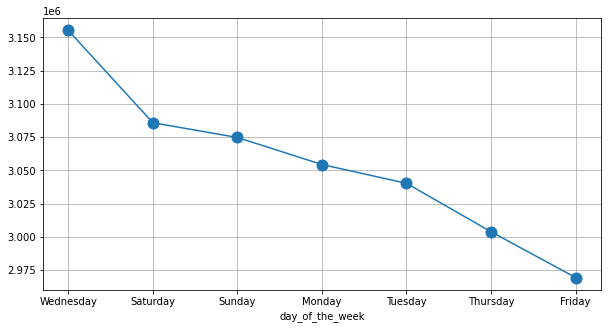

In [38]:
plt.figure(figsize=(10,5))
CTA.groupby('day_of_the_week')['list_price'].sum().sort_values(ascending=False).plot.line(markersize=11,marker='o');
plt.grid()

Observations:

1. The most Age that bought from us is 43 mainly the 40's
1. Most of the orders made was approved , so few wasn't approved of 
2. Manufacturing Job industry category are the most category to purchase from our products and Telecomunications are the lowest
3. Alot of customers are from NSW state
4. The highest amount of total sales was recorded in october
5. We mostly sell on wednesday,monday and saturday more than any other day during the week which means people tend to buy on vacations even huge part of sales are done online

# RFM Anlaysis

Now let's start doing a RFM analysis which is segmenting customers throught thier Recency(Recent purchases),Frequency(How many purchases have they done) & Monetary (How much revenue have they given the company)

In [39]:
CTA.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Year of birth,Age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,1955.0,66.0,984 Hoepker Court,3064,VIC,Australia,6


In [40]:
# This is a quick code to calculate Recency , frequency , monetary for each customer

end_date = max(CTA['transaction_date']) + dt.timedelta(days=1)

CTA_rfm = CTA.groupby('customer_id').agg(
    recency=('transaction_date', lambda x: (end_date - x.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()

CTA_rfm.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,100,12,2,2748.20
2,1000,1,9,10183.70
3,1001,43,7,6233.51
4,1002,156,4,5038.32


In [41]:
#statitics of the RFM

CTA_rfm.describe()

,recency,frequency,monetary
count,3412.000000,3412.00000,3412.000000
mean,62.635111,5.66442,6267.383883
std,58.548190,2.31148,2945.699196
min,1.000000,1.00000,60.340000
25%,19.000000,4.00000,4149.430000
50%,45.000000,6.00000,5979.365000
75%,87.000000,7.00000,8094.372500
max,354.000000,14.00000,19071.320000


In [42]:
# splitting customer into segments using quantiles

quantiles=CTA_rfm.quantile(q=[0.25,0.5,0.75])

In [43]:
quantiles.to_dict()

{'recency': {0.25: 19.0, 0.5: 45.0, 0.75: 87.0},
 'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'monetary': {0.25: 4149.43, 0.5: 5979.365, 0.75: 8094.3725}}

In [44]:
# we will segment data into four groups using quantiles 

## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1  

In [45]:
# apply the function to each rfm column to create segment for each customer in each r,f,m column

CTA_rfm['R'] = CTA_rfm['recency'].apply(RClass, args=('recency',quantiles))
CTA_rfm['F'] = CTA_rfm['frequency'].apply(FMClass, args=('frequency',quantiles))
CTA_rfm['M'] = CTA_rfm['monetary'].apply(FMClass, args=('monetary',quantiles))

In [46]:
#calculating RFM class by concatenating the score of each r,f,m & calculating the RFM score by summing the r,f,m segments 

CTA_rfm['RFMClass'] = CTA_rfm['R'].map(str) + CTA_rfm['F'].map(str) + CTA_rfm['M'].map(str)
CTA_rfm['RFMscore']= CTA_rfm[['R','F','M']].sum(axis=1)

In [47]:
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore
0,1,8,11,9084.45,1,1,1,111,3
1,100,12,2,2748.20,1,4,4,144,9
2,1000,1,9,10183.70,1,1,1,111,3
3,1001,43,7,6233.51,2,2,2,222,6
4,1002,156,4,5038.32,4,4,3,443,11


Apply evey RFM_Loyality_level to each customer in the original data frame

In [48]:
# Assigning Loyality level to each customer using qcut method which segments data as per number of quantiles decided

Loyality_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(CTA_rfm['RFMscore'],q=4,labels=Loyality_level)
CTA_rfm['RFM_loyalty_level']=score_cuts.values
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,8,11,9084.45,1,1,1,111,3,Platinum
1,100,12,2,2748.20,1,4,4,144,9,Silver
2,1000,1,9,10183.70,1,1,1,111,3,Platinum
3,1001,43,7,6233.51,2,2,2,222,6,Platinum
4,1002,156,4,5038.32,4,4,3,443,11,Bronze


Joinning CTA_rfm to customer demographics dataset 

In [49]:
# joinning dataset

CTA_rfm_allinfo=CTA.merge(CTA_rfm,on='customer_id',how='inner')

In [50]:
CTA_rfm_allinfo.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,6,76,3,1953.15,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,5,21,7,7351.70,2,2,2,222,6,Platinum
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,5,21,7,7351.70,2,2,2,222,6,Platinum


Finally we have segmented customer into 4 different segments and we should prioritize our marketing strategy as per each segment

In [51]:
# Exporting our CTA dataframe to apply  Data feauturing and Machine learning modeling on it in the other notebook

CTA_rfm_allinfo.to_csv('CTA_rfm_allinfo.csv')